In [1]:
#import the all suitable liberarys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#to read the dataset
df=pd.read_csv('hackthon.csv')

In [3]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
#to check the null present or not
df.isnull().sum()

input     1
output    1
dtype: int64

In [5]:
#to fill null values by median imputation
df['input']=df['input'].fillna(df['input'].median())
df['output']=df['output'].fillna(df['output'].median())

In [6]:
df.isnull().sum() #so rectify the null values

input     0
output    0
dtype: int64

In [7]:
#to print the statistical analysis
df.describe()

,input,output
count,1697.000000,1697.000000
mean,1.165257,-34.097671
std,78.982979,65.752922
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1697 non-null   float64
 1   output  1697 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [9]:
df.corr() #51% correlated for input and output

,input,output
input,1.000000,0.511748
output,0.511748,1.000000


<AxesSubplot:>

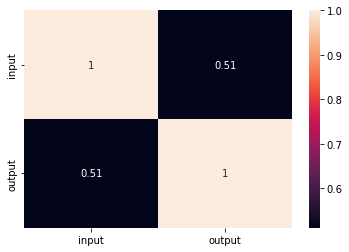

In [10]:
sns.heatmap(df.corr(),annot=True)

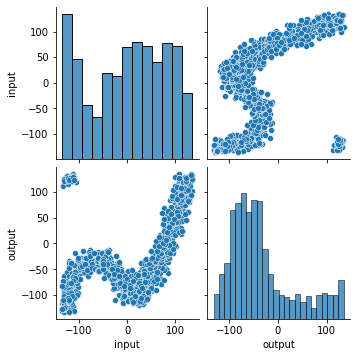

In [11]:
#print a pairplot
sns.pairplot(df)

from the above observation there is a positive correlation between the input feature and output feature

### feature engineering

- first conclude that whether our data is in normally distributed arev not

<AxesSubplot:xlabel='input', ylabel='Count'>

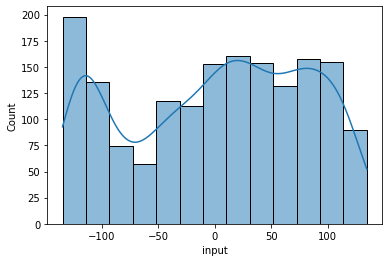

In [12]:
sns.histplot(df['input'],kde=True)

- here we confused whether it is anormal distributed are not
- so draw a Q-Q plot

In [13]:
#for that import the scipy module
import scipy.stats as stat
import pylab

((array([-3.34705771, -3.09284379, -2.95165276, ...,  2.95165276,
          3.09284379,  3.34705771]),
  array([-134.9628386, -134.9628386, -134.917019 , ...,  134.4631809,
          134.4631809,  134.6057752])),
 (76.82252731018792, 1.1652569006340712, 0.971235670884329))

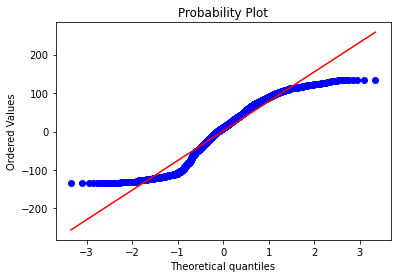

In [14]:
stat.probplot(df['input'],dist='norm',plot=pylab) #it is better

### outliers detection

C:\Users\saika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input'>

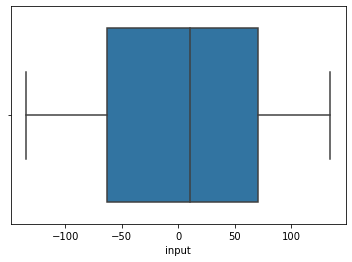

In [15]:
#for that we print boxplot
sns.boxplot(df['input'])

#### obseravtion:
- from the above observation we conclude that there is no outlier present in in it   

### feature engineering

- first we apply the transformations techniques
1. standard scaler

In [16]:
#for that we import the sklearn liberary in standard scaler()
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()
data=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [20]:
data.head()

,input,output
0,-1.569230,-1.467659
1,-1.553915,-1.458027
2,-1.723440,-1.461113
3,-1.542194,-1.394467
4,-1.659834,-1.197068


((array([-3.34705771, -3.09284379, -2.95165276, ...,  2.95165276,
          3.09284379,  3.34705771]),
  array([-134.9628386, -134.9628386, -134.917019 , ...,  134.4631809,
          134.4631809,  134.6057752])),
 (76.82252731018792, 1.1652569006340712, 0.971235670884329))

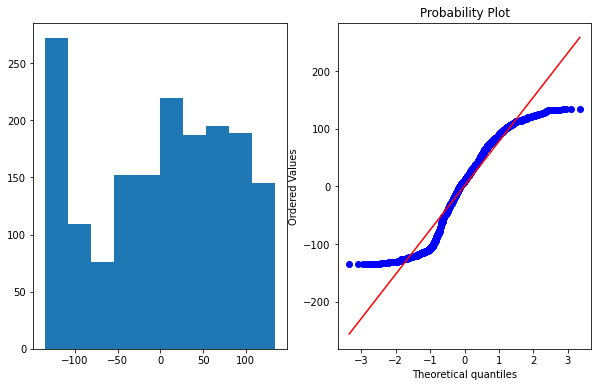

In [23]:
# now we visulize the data
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(df['input'])
plt.subplot(1,2,2)
stat.probplot(df['input'],dist='norm',plot=pylab)

##### observations:
- from above observations we apply gussian transformations
- it is not a skewed data then we donot applt logarithmic transformation

#### 1.reciprocal transformation

((array([-3.34705771, -3.09284379, -2.95165276, ...,  2.95165276,
          3.09284379,  3.34705771]),
  array([-1018.66443829,  -211.21546978,  -150.66711963, ...,
           130.72799966,   130.72799966,   138.2631088 ])),
 (9.669114770579137, -0.15735419420861138, 0.34559368083185554))

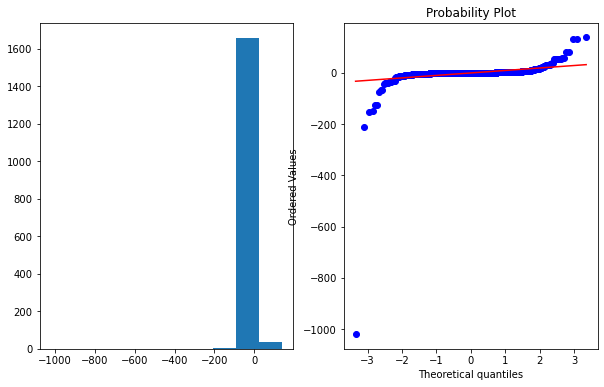

In [39]:
data['input_reci']=1/data['input']

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['input_reci'])
plt.subplot(1,2,2)
stat.probplot(data['input_reci'],dist='norm',plot=pylab)


#### observations
- from above observation the reciprocal transformation is worst
- so,we can do another transformation

#### 2.square root transformation

In [34]:
data['input_square']=data['input']**(1/2)

((array([-3.34705771, -3.09284379, -2.95165276, ...,  2.95165276,
          3.09284379,  3.34705771]),
  array([0.08504462, 0.08746125, 0.08746125, ...,        nan,        nan,
                nan])),
 (nan, nan, nan))

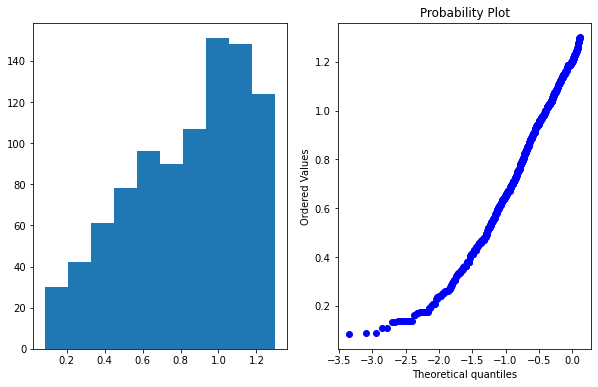

In [41]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['input_square'])
plt.subplot(1,2,2)
stat.probplot(data['input_square'],dist='norm',plot=pylab)
 

#### observations :
- from the above observation it is also not normally distributed
- we check another tranformation

#### 4.exponential tranformation

((array([-3.34705771, -3.09284379, -2.95165276, ...,  2.95165276,
          3.09284379,  3.34705771]),
  array([0.01644667, 0.01723294, 0.01723294, ...,        nan,        nan,
                nan])),
 (nan, nan, nan))

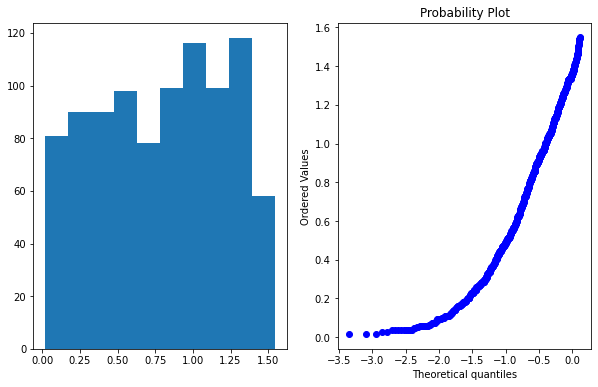

In [40]:
data['input_exp']=data.input**(1/1.2)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(data['input_exp'])
plt.subplot(1,2,2)
stat.probplot(data['input_exp'],dist='norm',plot=pylab)

#### observations:
- it is best when compared to the reciprocal and square root transformation
- next go to boxcox tranformation

#### 4. boxcox transformation
- the boxcox transformation is not done for negative values
- so here we cannot do boxcox transformation

### overall observations from feature engineering is :
- no need to applied gussian transformations tecniques.
- here the the orginal observation is the best when comapared to the other observations

##### algorithm selection

In [45]:

data.drop(['input_reci','input_square','input_exp'],axis=1,inplace=True)

In [46]:
data.head()

,input,output
0,-1.569230,-1.467659
1,-1.553915,-1.458027
2,-1.723440,-1.461113
3,-1.542194,-1.394467
4,-1.659834,-1.197068


In [47]:
#we divide the features into independent and dependent 
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [49]:
#for that we split the data into train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1272, 1) (425, 1) (1272,) (425,)


In [58]:
# it is a regresssion problem statement
#so we import all regression liberarys
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [63]:
models={
    'LinearRegression':LinearRegression(),
    'DecisionTree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor()
    #'KNeighborsRegressor':KNeighborsRegressor(),
    }
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train) #to train the model.
    
    #making predections
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #training_set performance
    model_train_squared_error=mean_squared_error(y_train,y_train_pred)
    model_train_absolute_error=mean_absolute_error(y_train,y_train_pred)
    
    
    #test set performance
    model_test_squared_error=mean_squared_error(y_test,y_test_pred)
    model_test_absolute_error=mean_absolute_error(y_test,y_test_pred)
    print(list(models.keys())[i])
    
    print('model performance of training set')
    print(' model_train_squared_error : ', model_train_squared_error)
    print(' model_train_absolute_error : ', model_train_absolute_error)
    
   
    print('-----------------------------------------------------------')
    
    print('Model performance of testing set')
    print('model_test_squared_error : ',model_test_squared_error)
    print(' model_test_absolute_error : ', model_test_absolute_error)

     
    print('='*38)
    print('\n')
    

LinearRegression
model performance of training set
 model_train_squared_error :  0.7503877791854611
 model_train_absolute_error :  0.6492704397827604
-----------------------------------------------------------
Model performance of testing set
model_test_squared_error :  0.702538220569332
 model_test_absolute_error :  0.6338471367439936


DecisionTree
model performance of training set
 model_train_squared_error :  0.02906082827230314
 model_train_absolute_error :  0.026103460464429157
-----------------------------------------------------------
Model performance of testing set
model_test_squared_error :  0.37065909570134137
 model_test_absolute_error :  0.2676248612500533


Random Forest
model performance of training set
 model_train_squared_error :  0.06374020953260932
 model_train_absolute_error :  0.1181871250120126
-----------------------------------------------------------
Model performance of testing set
model_test_squared_error :  0.3128182155431032
 model_test_absolute_error :  0

#### observations 

- from the above observation the decision tree regressor is best.

- why not linear regression. 

  -->  because the input data is not distributed normally thats why they give large error
    
- why not random forest.

   --> it is also give best accuracy but decision tree give best accuracy than random forest.

### hyper parameter training


In [67]:
#here we can select decision tree regressor and then do hyper parameter tuning
dt_params={'criterion': ['squared_error','friedman_mse','absolute_error'],
           'splitter' : ['best','random'] ,
            'max_features': ['auto', 'sqrt', 'log2'], 
             }


In [70]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [68]:
from sklearn.model_selection import RandomizedSearchCV


In [71]:
  random=RandomizedSearchCV(estimator=model,
                             param_distributions=dt_params,
                             n_iter=100,
                             cv=3,
                             verbose=2,
                             n_jobs=-1
                             )

In [74]:
#we print the best_params
random.fit(x_train,y_train)
random.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'splitter': 'random', 'max_features': 'log2', 'criterion': 'squared_error'}

In [76]:
#the above params are best params
model=DecisionTreeRegressor(splitter='random', max_features='log2', criterion='squared_error')
model

DecisionTreeRegressor(max_features='log2', splitter='random')

In [77]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_features='log2', splitter='random')

In [78]:
# to predict the data
y_pred=model.predict(x_test)

In [88]:
from sklearn.metrics import mean_squared_error,mean_absolute_error 
mean_squared_error(y_test,y_pred)


0.35238590290052024

In [87]:
mean_absolute_error(y_test,y_pred)

0.2575828854218586

### Linear regression

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [91]:
y_pred=model.predict(x_test)

In [92]:
from sklearn.metrics import mean_squared_error,mean_absolute_error 
mean_squared_error(y_test,y_pred)

0.702538220569332

In [93]:
mean_absolute_error(y_test,y_pred)

0.6338471367439936

### FINAL OBSERVATIONS
 
- from above all algorithms the decision tree regressor is the best.
- because it reduces the mean absolute and mean squared error.
- linear regression gives maximum absolute and square error.